In [2]:
import os, io
from google.cloud import vision
from google.cloud.vision_v1 import types
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Polygon

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'visionAPIkey.json'

In [3]:
# API
client = vision.ImageAnnotatorClient()

# image 
image_path = "Photo on 5-2-22 at 12.21 PM.jpg"
with io.open(image_path, 'rb') as image_file:
    content = image_file.read()

# construct an iamge instance
image = types.Image(content=content)

"""
# or can pass the image url
image = vision.types.Image()
image.source.image_uri = 'https://edu.pngfacts.com/uploads/1/1/3/2/11320972/grade-10-english_orig.png'
"""

response = client.text_detection(image=image)  # returns TextAnnotation
df = pd.DataFrame(columns=['locale', 'description'])

texts = response.text_annotations
for text in texts:
    df = df.append(
        dict(
            locale=text.locale,
            description=text.description
        ),
        ignore_index=True
    )

print(df['description'][0])

Frult/Veg HFER
1x 1,00
Frult/Veg OFFER
1x 1.20
Anount
1.00
Frult/Veg OFFER
1 x 1.50
1.20
CELERY
0, 648 x 4.00
1.50
INICURD FRESH HOR FUN 4200
1 x 1.90
UNICURD TAU KWA 400G
2.59
1.90
1x 1.50
FRESH PANEER 50OG
SUVAI
1 x 9.30
ZUCCHINI
9.30
0.3 x 8.00
IND GREEN MANG0
2. 40
0. 722 x 7.50
IND POMEGRANATE (ANAR)
5.41
0. 222 x 9. 90
POTATO HOLLAND
2. 19
1. 124 x 2. 10
CORIANDER LEAVE (DHANIA)
0. 098 x 10.00
FRENCH BEANS
0. 282 x 8. 50
2.36
0.98
2.39
MINT LEAVES
RINI
.064 x 7.00
0.44
PARMAL
0.336 x 7. 80
LOCAL TOMATO
1.018 x 3. 50
TINDA
0. 188 x 7. 80
MEITHI LEAVES
0.09 x 10. 00
PALAK LEAVES
0. 142 x 10.00
2,62
3.56
1.46
0.90
1.42
Subtotal
Total
Rounding
45. 12
45. 12
-0. 02
Nets
CHANGE
45, 10
0.00
7% GST Inc
Total QTY
Tatal Items
2.84
11.234
19
Points Changes (pts)
Points Avallable(pts)
Thank you for shapping with us!
Exchange are allowed within 7 days ith
+136. 00
333. 00
orIginal recelpt.
Strictly no cash refund.
Fresh & per Ishable goods, health & beauty
products and alcohols are
non-exchan

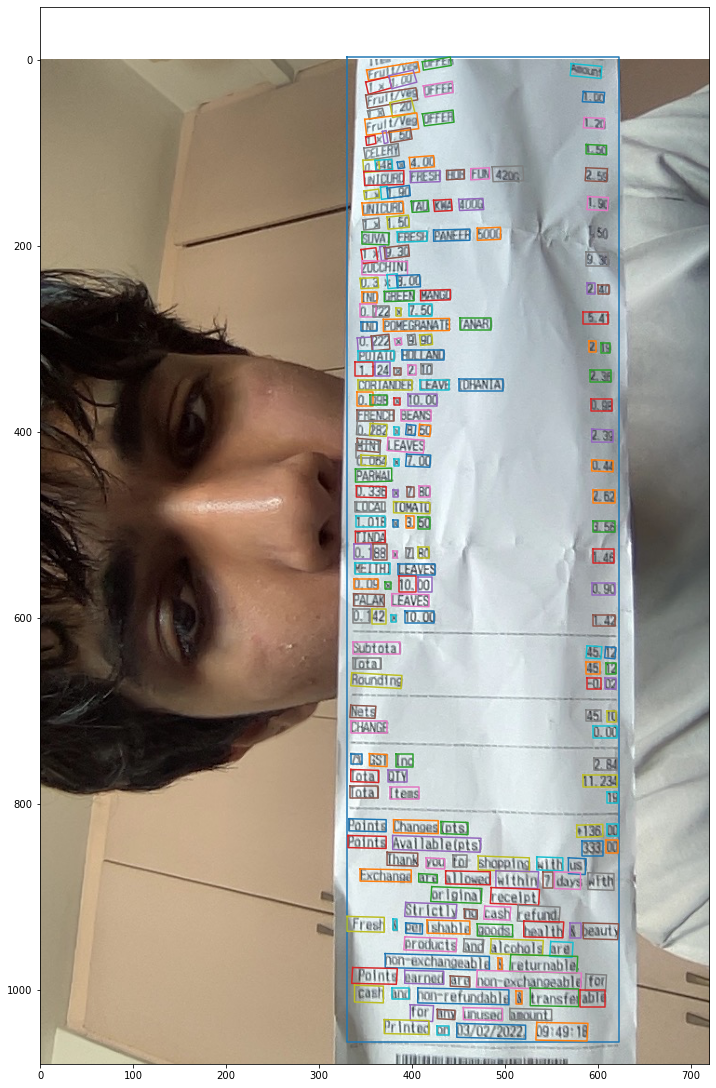

In [4]:
texts = response.text_annotations
full_text = texts[0]
#print(full_text.bounding_poly.vertices)
plt.figure(figsize=(12, 20))
plt.imshow(Image.open(image_path))
for text in texts:    
    vertices = [[vertex.x, vertex.y] for vertex in text.bounding_poly.vertices]
    vertices.append(vertices[0]) #repeat the first point to create a 'closed loop'

    xs, ys = zip(*vertices) #create lists of x and y values
    plt.plot(xs,ys) 
plt.savefig('annotated_receipt.png')
plt.show() # if you need...

In [ ]:
texts = response.text_annotations
full_text = texts[0]
#print(full_text.bounding_poly.vertices)
plt.imshow(Image.open(image_path))
for vertex in full_text.bounding_poly.vertices:
    plt.scatter(vertex.x, vertex.y)